# Analysis: 20260612

In [ ]:
!pip install nucleus-cdk | tail -n2

In [1]:
from cdk.analysis.cytosol import platereader as pr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter warnings
warnings.filterwarnings('ignore')

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [2]:
data, platemap = pr.load_platereader_data("./data/20250612-cytation3-pure-timecourse-gfp-ppk-biotek-cdk.txt", "20250612-PPK.csv")

# Basic Plots

## Kinetics 
Kinetic time traces of every well on the plate

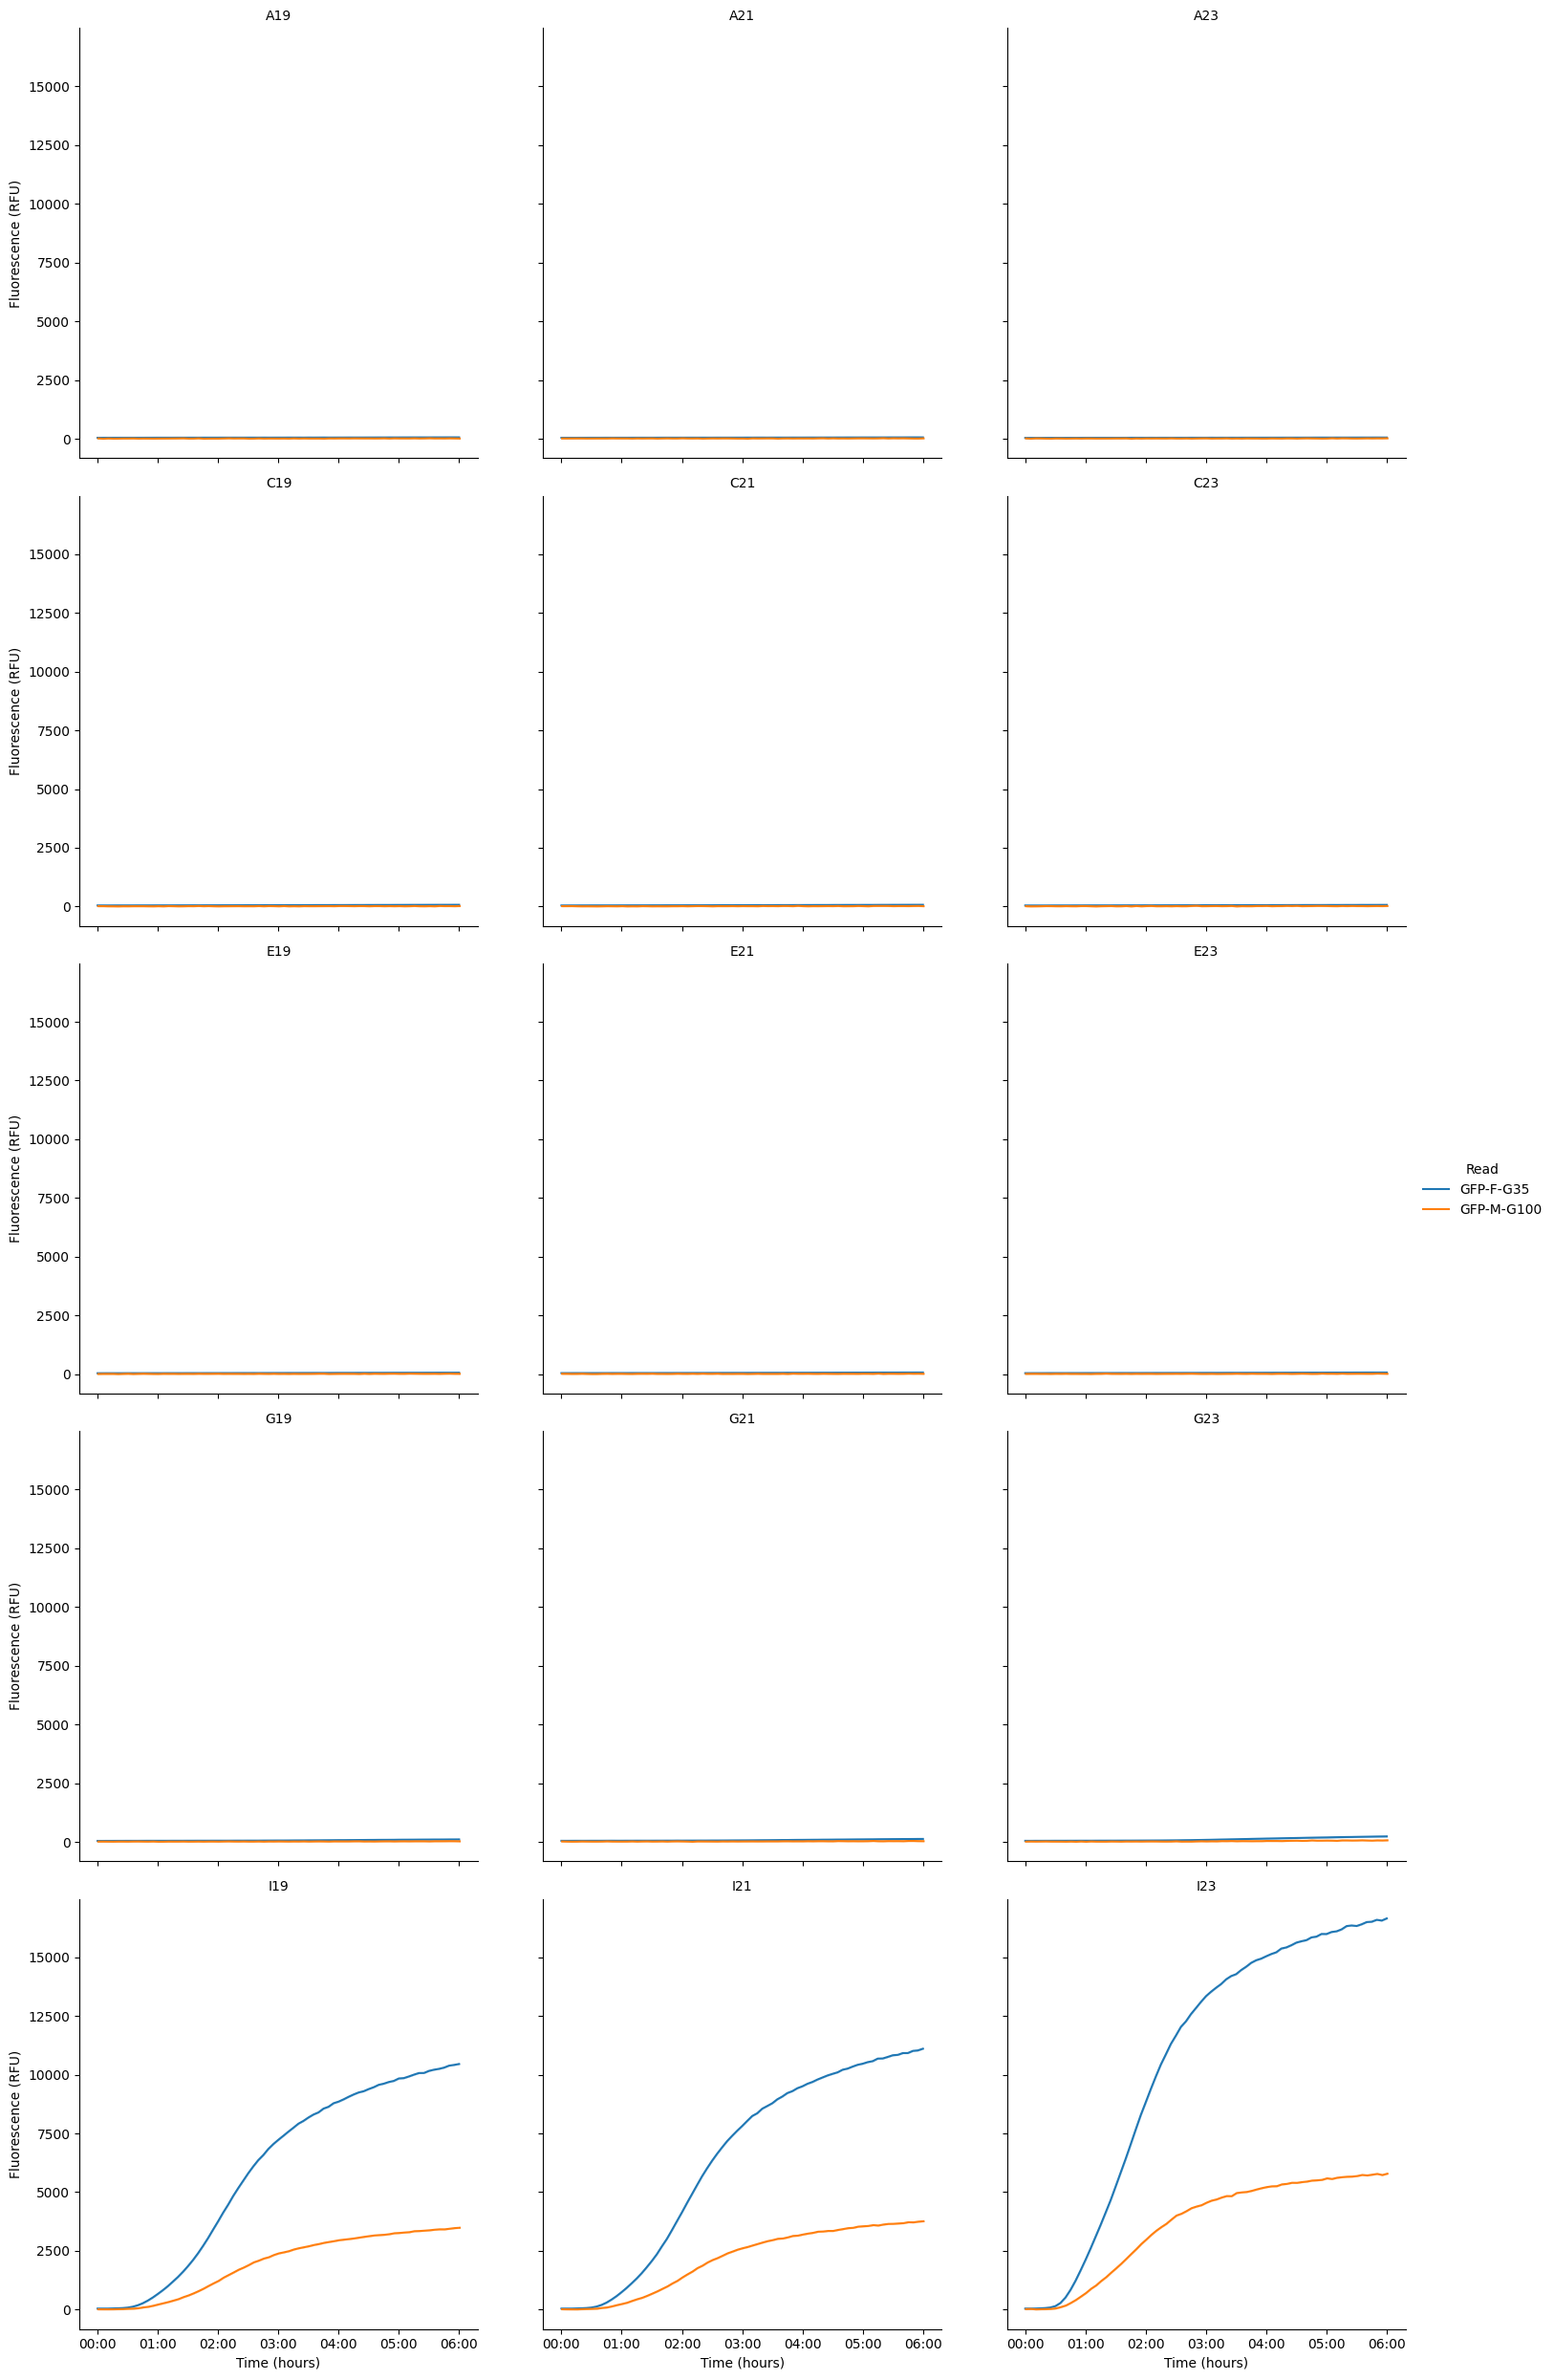

In [3]:
pr.plot_plate(data);

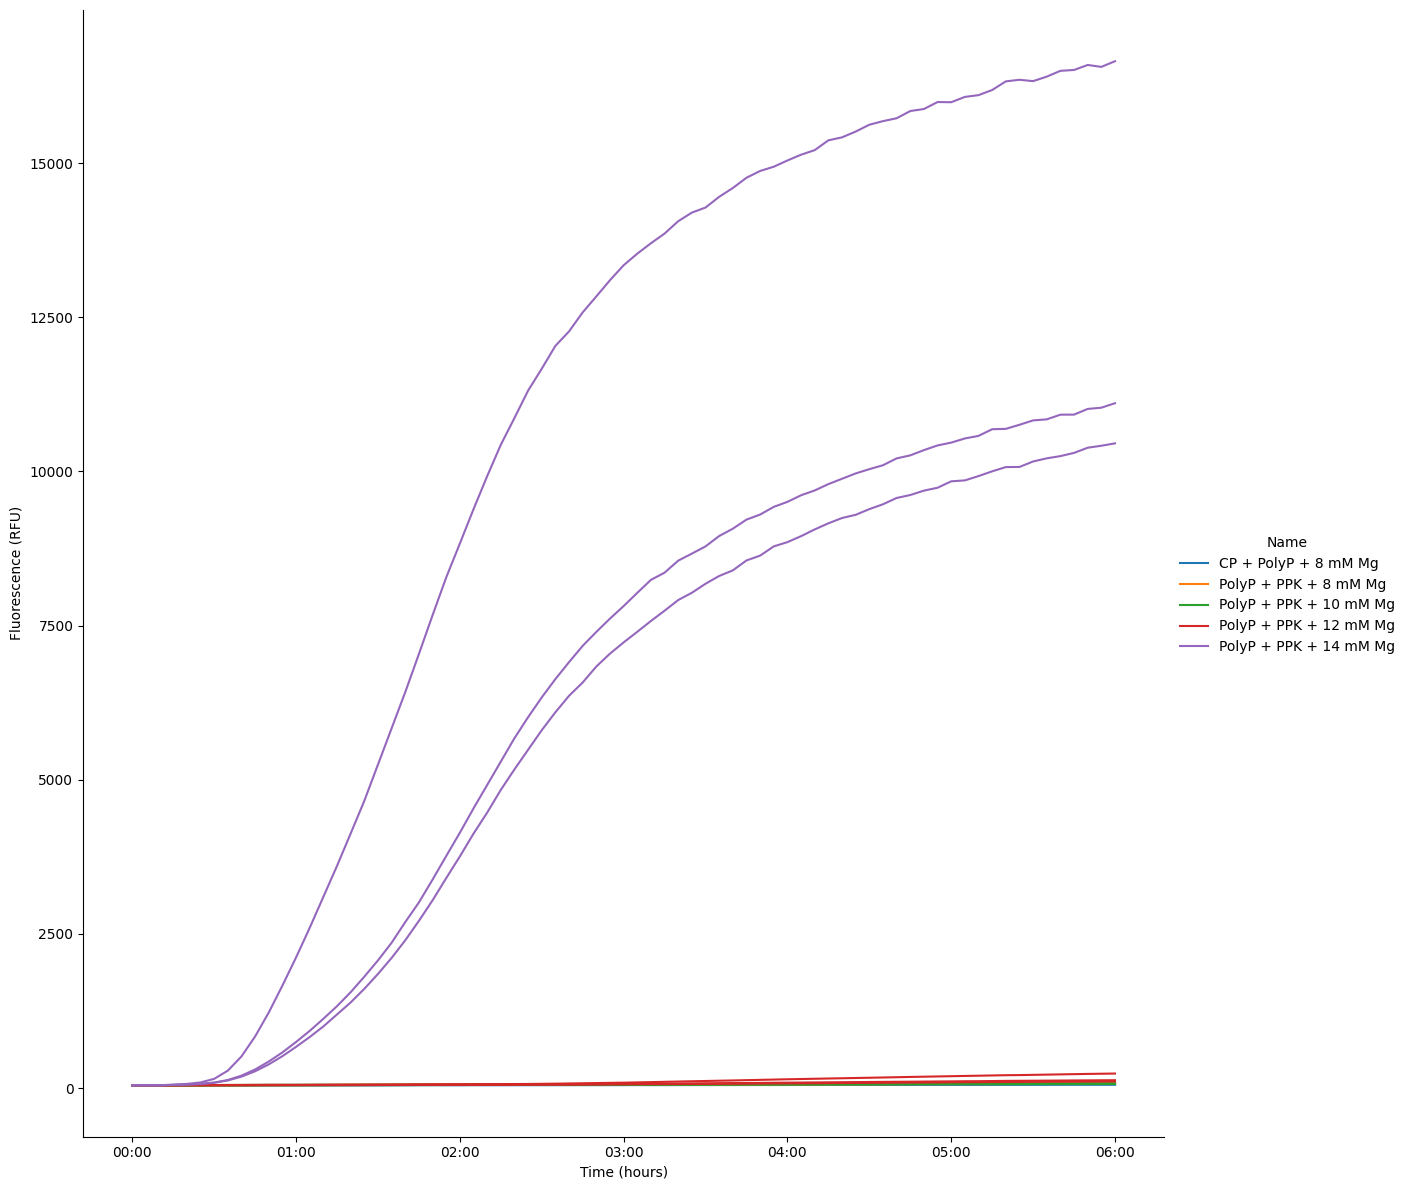

In [32]:
g = pr.plot_curves(data[data["Read"]=="GFP-F-G35"], units="Well", estimator=None, height=12)
g.savefig("plot4")

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.

<Axes: xlabel='Name', ylabel='Data_steadystate'>

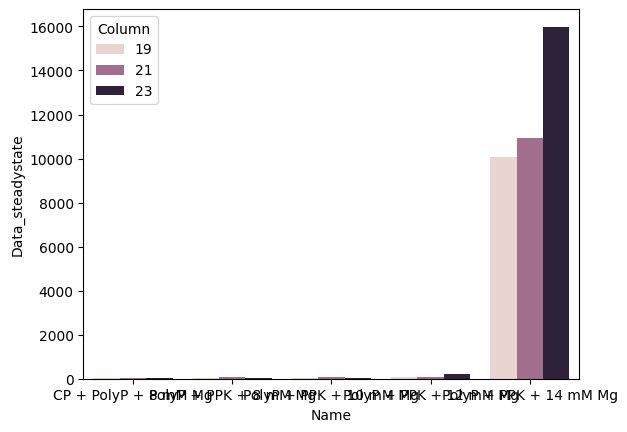

In [20]:
steadystate = data.merge(pr.find_steady_state(data[data["Read"]=="GFP-F-G35"]).reset_index(), on="Well", how="left")
steadystate.loc[steadystate["Column"]==13, "Column"] = 14
sns.barplot(data=steadystate, x="Name", y="Data_steadystate", hue="Column")

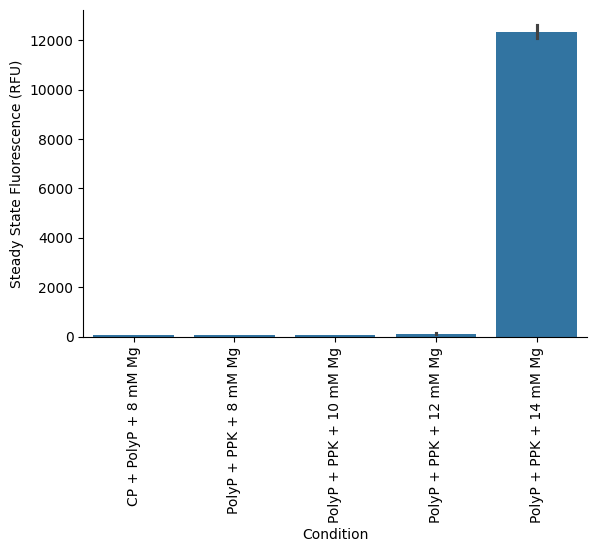

In [4]:
#| label: fig:endpoint-exp3

ss= pr.plot_steadystate(data[data["Read"]=="GFP-F-G35"])
plt.xlabel('Condition')
ss.savefig("plot5")

# Kinetics Analysis
These functions calculate key kinetic parameters of the time series.

Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


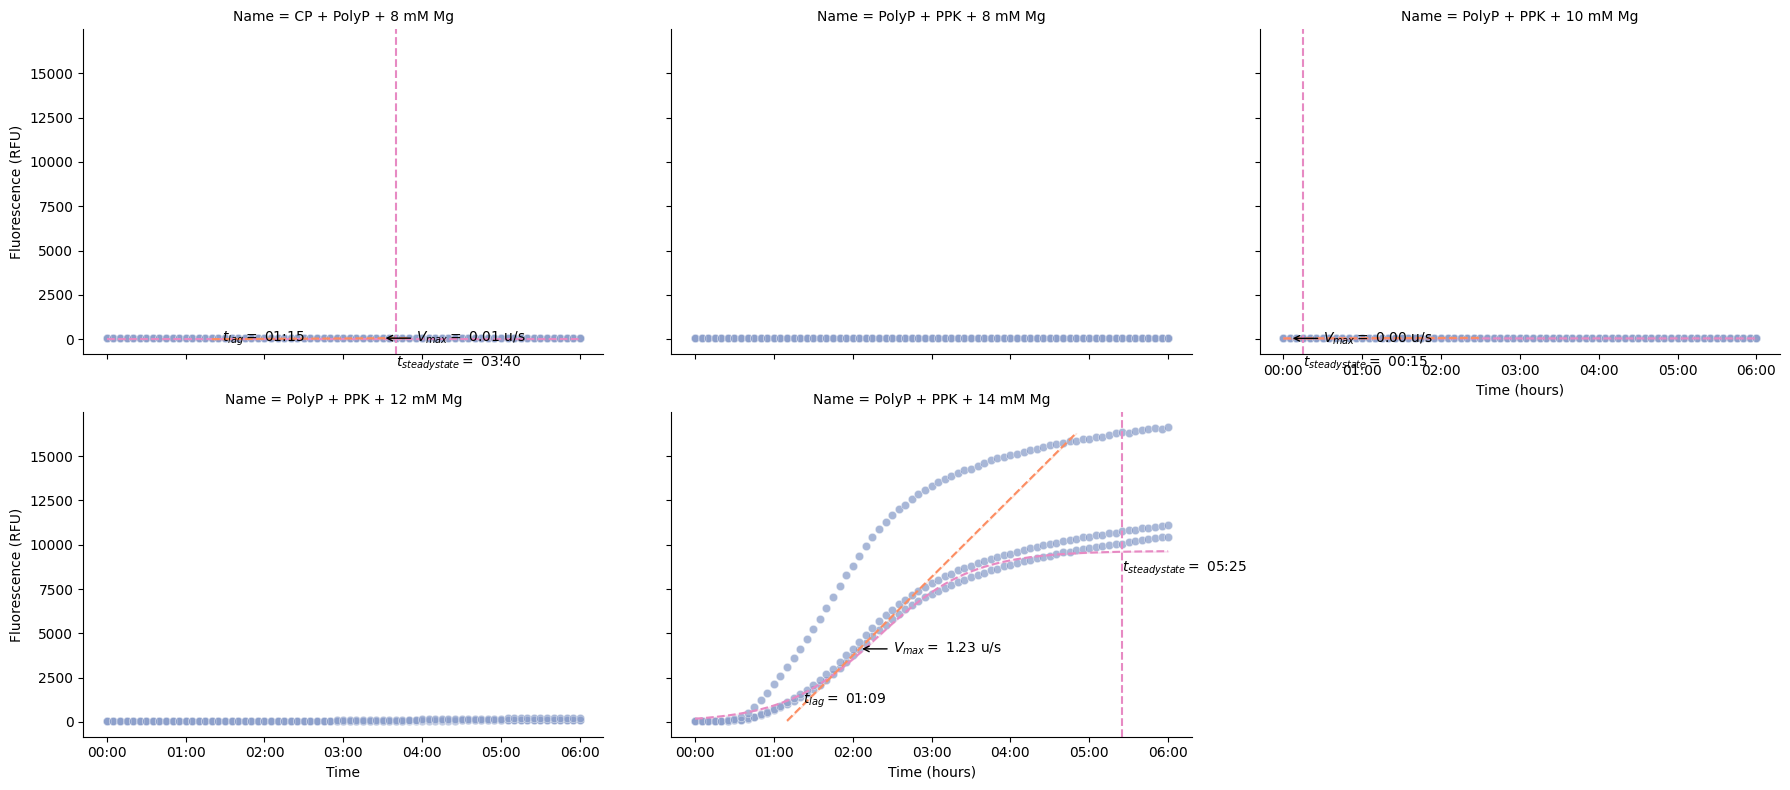

In [22]:
pr.plot_kinetics(data[data["Read"] == "GFP-F-G35"])

We can also calculate the kinetics and display the parameters as a table.

In [23]:
pr.kinetic_analysis(data)

Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Failed to solve: Optimal parameters not found: Number of calls to function has reached maxf

Velocity               \
                                                  Time    Data  Max   
Well Name                   Read                                      
A19  CP + PolyP + 8 mM Mg   GFP-F-G35  0 days 03:30:00   54.00 0.01   
A21  CP + PolyP + 8 mM Mg   GFP-F-G35  0 days 00:20:00   45.00 0.00   
A23  CP + PolyP + 8 mM Mg   GFP-F-G35              NaT     NaN  NaN   
C19  PolyP + PPK + 8 mM Mg  GFP-F-G35              NaT     NaN  NaN   
C21  PolyP + PPK + 8 mM Mg  GFP-F-G35              NaT     NaN  NaN   
C23  PolyP + PPK + 8 mM Mg  GFP-F-G35              NaT     NaN  NaN   
E19  PolyP + PPK + 10 mM Mg GFP-F-G35  0 days 00:05:00   43.00 0.00   
E21  PolyP + PPK + 10 mM Mg GFP-F-G35              NaT     NaN  NaN   
E23  PolyP + PPK + 10 mM Mg GFP-F-G35              NaT     NaN  NaN   
G19  PolyP + PPK + 12 mM Mg GFP-F-G35              NaT     NaN  NaN   
G21  PolyP + PPK + 12 mM Mg GFP-F-G35              NaT     NaN  NaN   
G23  PolyP + PPK + 12 mM Mg GFP-F-G35              NaT     NaN  NaN   
I19  PolyP + PPK + 14 mM Mg GFP-F-G35  0 days 02:05:00 4125.00 1.23   
I21  PolyP + PPK + 14 mM Mg GFP-F-G35  0 days 02:05:00 4535.00 1.32   
I23  PolyP + PPK + 14 mM Mg GFP-F-G35  0 days 01:50:00 7667.00 2.09   
A19  CP + PolyP + 8 mM Mg   GFP-M-G100             NaT     NaN  NaN   
A21  CP + PolyP + 8 mM Mg   GFP-M-G100 0 days 03:10:38   18.00 0.04   
A23  CP + PolyP + 8 mM Mg   GFP-M-G100             NaT     NaN  NaN   
C19  PolyP + PPK + 8 mM Mg  GFP-M-G100 0 days 01:10:38   18.00 0.03   
C21  PolyP + PPK + 8 mM Mg  GFP-M-G100             NaT     NaN  NaN   
C23  PolyP + PPK + 8 mM Mg  GFP-M-G100 0 days 01:50:38   22.00 0.05   
E19  PolyP + PPK + 10 mM Mg GFP-M-G100 0 days 00:25:38   13.00 0.03   
E21  PolyP + PPK + 10 mM Mg GFP-M-G100             NaT     NaN  NaN   
E23  PolyP + PPK + 10 mM Mg GFP-M-G100             NaT     NaN  NaN   
G19  PolyP + PPK + 12 mM Mg GFP-M-G100 0 days 00:35:38   17.00 0.02   
G21  PolyP + PPK + 12 mM Mg GFP-M-G100 0 days 02:15:38   20.00 0.04   
G23  PolyP + PPK + 12 mM Mg GFP-M-G100             NaT     NaN  NaN   
I19  PolyP + PPK + 14 mM Mg GFP-M-G100 0 days 02:05:38 1361.00 0.46   
I21  PolyP + PPK + 14 mM Mg GFP-M-G100 0 days 02:15:38 1768.00 0.49   
I23  PolyP + PPK + 14 mM Mg GFP-M-G100 0 days 01:55:38 2793.00 0.73   

                                                             Lag          \
                                                            Time    Data   
Well Name                   Read                                           
A19  CP + PolyP + 8 mM Mg   GFP-F-G35            0 days 01:15:00    0.00   
A21  CP + PolyP + 8 mM Mg   GFP-F-G35          -1 days +20:35:00   24.75   
A23  CP + PolyP + 8 mM Mg   GFP-F-G35                        NaT     NaN   
C19  PolyP + PPK + 8 mM Mg  GFP-F-G35                        NaT     NaN   
C21  PolyP + PPK + 8 mM Mg  GFP-F-G35                        NaT     NaN   
C23  PolyP + PPK + 8 mM Mg  GFP-F-G35                        NaT     NaN   
E19  PolyP + PPK + 10 mM Mg GFP-F-G35          -1 days +20:30:00    0.00   
E21  PolyP + PPK + 10 mM Mg GFP-F-G35                        NaT     NaN   
E23  PolyP + PPK + 10 mM Mg GFP-F-G35                        NaT     NaN   
G19  PolyP + PPK + 12 mM Mg GFP-F-G35                        NaT     NaN   
G21  PolyP + PPK + 12 mM Mg GFP-F-G35                        NaT     NaN   
G23  PolyP + PPK + 12 mM Mg GFP-F-G35                        NaT     NaN   
I19  PolyP + PPK + 14 mM Mg GFP-F-G35  0 days 01:09:06.341463415 1170.02   
I21  PolyP + PPK + 14 mM Mg GFP-F-G35  0 days 01:07:35.696202532 1275.20   
I23  PolyP + PPK + 14 mM Mg GFP-F-G35  0 days 00:48:57.420382166    0.00   
A19  CP + PolyP + 8 mM Mg   GFP-M-G100                       NaT     NaN   
A21  CP + PolyP + 8 mM Mg   GFP-M-G100 0 days 03:03:42.615384615   14.45   
A23  CP + PolyP + 8 mM Mg   GFP-M-G100                       NaT     NaN   
C19  PolyP + PPK + 8 mM Mg  GFP-M-G100           0 days 01:01:38   12.31   
C21  PolyP + PPK + 8 mM Mg  GF